In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv('/kaggle/input/email-spam-classification-dataset/combined_data.csv')

In [3]:
ds.shape

(83448, 2)

In [4]:
ds.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
ds.columns

Index(['label', 'text'], dtype='object')

In [7]:
ds.sample(5)

,label,text
12015,1,i bring down a bit of its light to listen by t...
80217,1,the world has gone wireless and mobile airwave...
43940,1,don't decline the chance  anatrim  the up to...
48272,0,oneok inc sec filing alert oneok inc has filed...
81687,1,from : ahmed seiko\nemail : ahmed _ se @ arabt...


In [8]:
ds.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
ds['label'].unique()

array([1, 0])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(ds.text,ds.label,test_size=0.3)

In [12]:
x_train

31282    on monday escapenumber april escapenumber esca...
13502    sehr geehrte investoren hier eine mitteilung d...
37554    michelle ,\nas discussed we are planning 200 l...
68613    send msn list mailing list submissions to msn ...
23370    hi there i am able to create a multidimensiona...
                               ...                        
26327    this one is shoe in to double by end of week h...
71718    hello all i am once again analyzing patient su...
23042    the high whites spread over the buried earth t...
46887    hi all i am a freshman of r but i am intereste...
82196    thinking of breathing new life into your busin...
Name: text, Length: 58413, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer=CountVectorizer()

In [15]:
x_train_count=vectorizer.fit_transform(x_train.values)

In [16]:
x_train_count.shape

(58413, 257224)

In [17]:
x_train_count

<58413x257224 sparse matrix of type '<class 'numpy.int64'>'
	with 7039605 stored elements in Compressed Sparse Row format>

In [18]:
y_train.shape

(58413,)

In [19]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [20]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [21]:
x_test_count=vectorizer.transform(x_test)

In [22]:
y_predicted=model.predict(x_test_count)

In [23]:
model.score(x_test_count,y_test)

0.9754743359296985

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[11670,   185],
       [  429, 12751]])

In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'predicted')

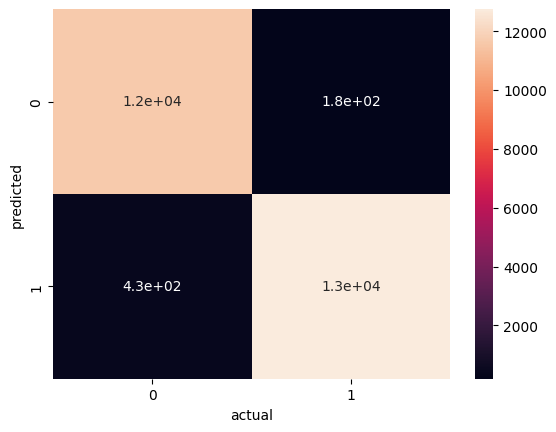

In [27]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11855
           1       0.99      0.97      0.98     13180

    accuracy                           0.98     25035
   macro avg       0.98      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035

